# Simple Linear Regression
Developed by Cristian Quintero and Vinco SAS
  
    Basically having 19 macroeconomic variables data, like this:
    - TRM        : (Tasa Representativa del Mercado, by spanish meaning), some like USD/COP price
    - BRENT      : BRENT Futures prices
    - DXY        : Dollar index, front other currrencies
    - LEMB       : Local Emerging Market Bonds Index (ETF)
    - US2Y       : TES 2 years yield (USA)
    - ORO        : Futures Gold prices
    - S&P500     : Standar & Poors Index
    - US10Y      : TES 10 years yield(USA)
    - TES24      : Colombian Soverign Bonds 24
    - CEW        : WisdomTree Emerging Currency Strategy Fund (ETF) - composed by emerging currency rates
    - WTI        : WTI Futures price
    - USDEUR     : USD/EUR pair currency price
    - DAX        : Frankfort (Germany) stock market index
    - GE10Y      : German 10 years Bond yield
    - GE2Y       : German 2 years Bond yield
    - USDJPY     : USD/JPY pair currency price
    - NIKKEI225  : Tokio (Japan) stock market index
    - JP20Y      : Japanese 20 years Bond yield
    - JP2Y       : Japanese 2 years Bond yield
    
    We could calculate a simple linear regression which letting us get the TRM behaviour in front of all other variables

In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

In [5]:
# Lectura de las variables a utilizar en la regresion lineal
# Fecha # TRM # BRENT # DXY # LEMB # US2Y # ORO # S&P500 # US10Y # TES24
# CEW # WTI # USDEUR # DAX # GE10Y # GE2Y # USDJPY # NIKKEI225 # JP20Y
# JP2Y
datos = pd.read_excel('Datos.xlsx','Datos')
datos_test = pd.read_excel('Datos_test.xlsx','Datos')

In [59]:
regression = linear_model.LinearRegression()
y = datos['TRM'].values
x = datos['WTI'].values[:,np.newaxis]
regression.fit(x, y)
#print(regression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
x_test = datos_test['WTI'].values[:,np.newaxis]
y_test = regression.predict(x_test)
regression_coef = regression.coef_
mse = mean_squared_error(y_test, y[-len(y_test):])
r2_explained_variance = r2_score(y_test, y[-len(y_test):])

print('* Coeficientes: \n',regression_coef)
print('* MSE (Mean Square Error): %.2f' %  mse)
print('  -                square: %.2f' %  math.sqrt(mse))
print('* R explained variance   : %.2f' %  r2_explained_variance)


* Coeficientes: 
 [-25.31974519]
* MSE (Mean Square Error): 131450.87
  -                square: 362.56
* R explained variance   : -18.62


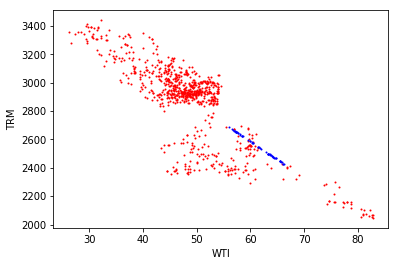

In [57]:
plt.scatter(x, y, color='red', s=1)
plt.scatter(x_test, y_test, color='blue', s=1)
plt.ylabel("TRM")
plt.xlabel("WTI")
plt.show()